In [1]:
#Setup

# Install Packages
import sys
!{sys.executable} -m pip install numpy --quiet
!{sys.executable} -m pip install matplotlib --quiet
!{sys.executable} -m pip install seaborn --quiet
!{sys.executable} -m pip install sklearn --quiet

from sklearn import preprocessing
import os, requests
from matplotlib import rcParams 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.linear_model import LinearRegression
    
# Data Retrieval

fname = 'joystick_track.npz'
url = "https://osf.io/6jncm/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)
# Import matplotlib and set styling
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

colourmap_diverge = sns.diverging_palette(321, 172, s=100, n=100, center = "light", as_cmap=True)
colourmap = sns.color_palette("rocket", as_cmap=True)
colourmap = sns.light_palette("#30887c", as_cmap=True)
colourmap_diverge.set_bad("black", alpha=0)
colourmap.set_bad("black", alpha=0)

# Data Loading
alldat = np.load(fname, allow_pickle=True)['dat']

# Select just one of the recordings here. This is subject 1, block 1.
dat = alldat[0, 3]

You should consider upgrading via the 'C:\Users\richa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\richa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\richa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\richa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [47]:
# Load patient 2
dat = alldat[0, 2]
# Selected channels of high correlations for patient 2
corr_chan = sorted([5, 23, 17, 1, 25])

V = dat['V']
V_corr = dat['V'][:,corr_chan]
nt, nchan = V_corr.shape
print(nt, nchan)

cx = dat['cursorX'].flatten()
cy = dat['cursorY'].flatten()

134360 5


In [96]:
# split into 80:20 train test split
nt, nchan = V_corr.shape

boundary = math.ceil(nt*0.8)

V_train = V_corr[:boundary, :]
V_test = V_corr[boundary:, :]

cx_train = cx[:boundary]
cx_test = cx[boundary:]
cy_train = cy[:boundary]
cy_test = cy[boundary:]

In [97]:
# Construct train matrices
nt, nchan = V_train.shape


# Number of hindsight values
hindsight = 2
# lag between hindight values
lag = 500

# Generate feature indices
i0 = h*l
iN = nt
feature_step = 200
indices = range(i0, iN, feature_step)

# Generate 
no_obs = len(indices)
no_vars_rgand = 2    #Number of regressand variables (x and y)
no_vars_rgor = len(corr_chan) * (h+1)

regressand = np.zeros((no_obs, no_vars_rgand))
regressor = np.zeros((no_obs, no_vars_rgor))

for j, ind in enumerate(indices):
    regressand[j, 0] = cx_train[ind]
    regressand[j, 1] = cy_train[ind]
    for i, chan in enumerate(corr_chan):
        for h in range(hindsight+1):
            regressor[j, (hindsight+1)*i + h] = V_train[ind - h * lag, i]



#TO DO test and train splits





In [98]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3


reg = LinearRegression().fit(regressor, regressand)
print(reg.score(regressor, regressand))

#print(reg.coef_)
#print(reg.intercept_)
#reg.predict(np.array([[3, 5]]))


0.4365063058389228


In [99]:
# Construct test matrices
nt, nchan = V_test.shape

# Generate feature indices
i0 = h*l
iN = nt
test_step = 1
indices = range(i0, iN, test_step)

# Generate 
no_obs = len(indices)
no_vars_rgand = 2    #Number of regressand variables (x and y)
no_vars_rgor = len(corr_chan) * (h+1)

regressand = np.zeros((no_obs, no_vars_rgand))
regressor = np.zeros((no_obs, no_vars_rgor))

for j, ind in enumerate(indices):
    regressand[j, 0] = cx_test[ind]
    regressand[j, 1] = cy_test[ind]
    for i, chan in enumerate(corr_chan):
        for h in range(hindsight+1):
            regressor[j, (hindsight+1)*i + h] = V_test[ind - h * lag, i]

(25872, 2)


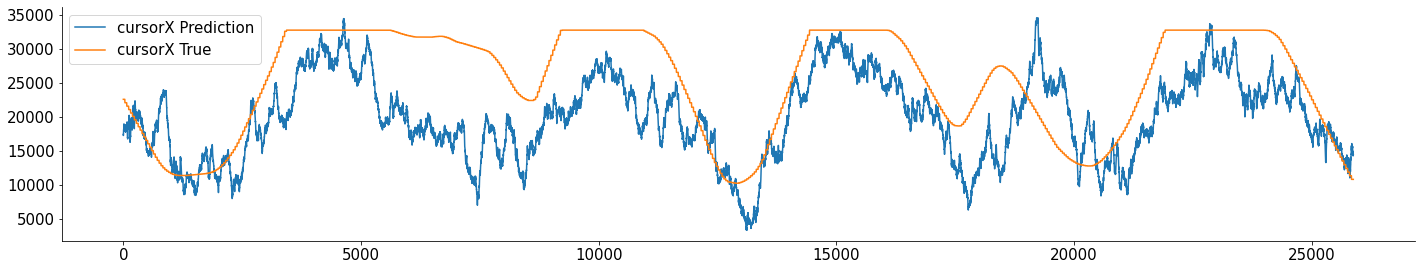

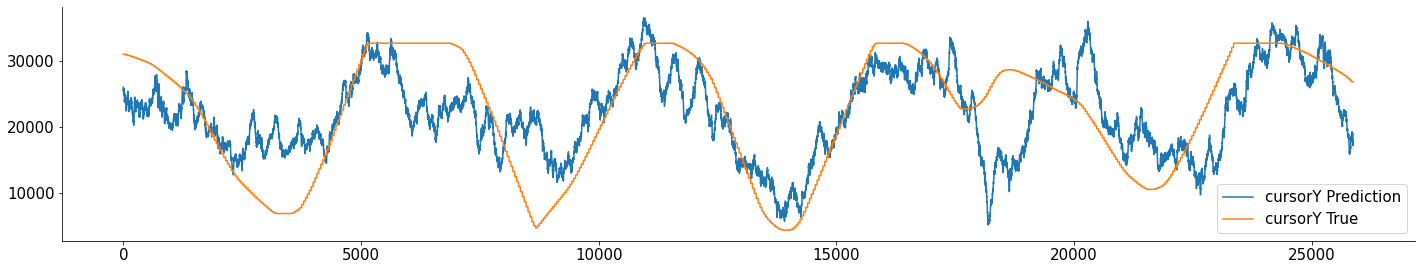

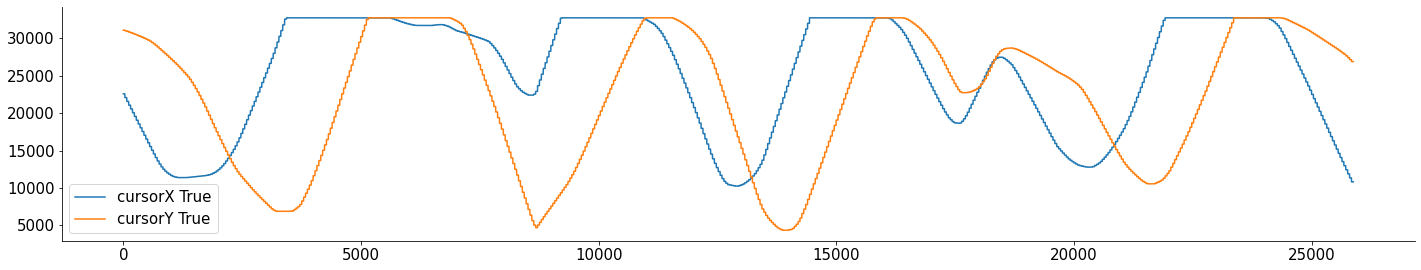

In [100]:
nt, nvar = regressor.shape


predict = reg.predict(regressor[:,:])
print(regressand.shape)

plt.figure()
plt.plot(predict[:,0], label='cursorX Prediction')
plt.plot(regressand[:,0], label='cursorX True')
plt.legend()

plt.figure()
plt.plot(predict[:,1], label='cursorY Prediction')
plt.plot(regressand[:,1], label='cursorY True')
plt.legend()

plt.figure()
plt.plot(regressand[:,0], label='cursorX True')
plt.plot(regressand[:,1], label='cursorY True')
plt.legend()
        

In [101]:
# Attempt to find optimal lag parameters

# First, calculate autocorrelation of cursor X and Y to suggest optimal hindsight values



In [ ]:
''